# Logistic Regression Exercise

This exercise will guide you in implementing a Linear Model for classification namely, Logistic Regression, to gain intuitions and develop a deeper understanding of classification models. These concepts will form as the foundation for more complex models later on.

**You will learn to:**
- Build the general architecture of a Logistic Regression Model.
    - Initializing Parameters/Weights
    - Implement the activation function that maps your raw scores to probabilities.
    - Calculating the Cost/Loss/Objective Function
    - Computing for the gradients of the Loss function with respect to the parameters
    - Implement gradient descent to update the paramters
- Write data into an hdf5 file
    - store (multiple) data sets in one hdf5 file
- Read data from an hdf5 file.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import misc
import os
import h5py

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

# Data
Let's first start with a toy dataset, so we can visualize our data in 2D. The data generated below are sampled from two Gaussian distributions centered at $(-3,0)$ and $(-1,4)$.

In [2]:
np.random.seed(1)
from sklearn.datasets import make_blobs
centers = [[-3, 0], [-1, 4]]

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=centers)
y = np.expand_dims(y,-1)

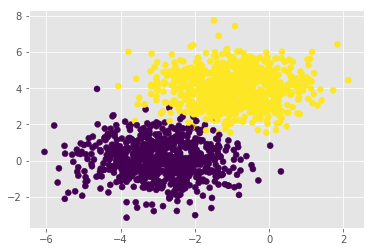

In [3]:
# plot the data
plt.scatter(X[:,0], X[:,1],c=np.squeeze(y))

$X \in \mathbb{R}^{N,D}$ - our data is represented as a matrix with $N$ rows and $D$ columns, where each row is a $D$-dimensional feature vector representing an instance / example in our dataset $(x_i \in \mathbb{R}^D)$. In this particular example, $D=2$.



$y \in \{1,0\}^N$ - the prediction target is represented as a vector of length $N$ and each example can only take on either $1$ or $0$.  

In [23]:
for i in range(5):
    print("X[{}] = {}\t y[{}] = {}".format(i, X[i], i, y[i]))

X[0] = [-1.65382452  4.35946107]	 y[0] = [1]
X[1] = [-3.42449279 -0.73153098]	 y[1] = [0]
X[2] = [-2.3836786   3.13304478]	 y[2] = [1]
X[3] = [-1.43758047 -0.87080155]	 y[3] = [0]
X[4] = [-3.12289023 -0.93576943]	 y[4] = [0]


# Logistic Regression

###  Initialize Weights! We initialize the weights with small random values and the biases are initialized to zero.
**Open `logistic_regression.py`, and fill in the code for the function `initialize_weights`.**

In [24]:
from logistic_regression import LogisticRegression

In [25]:
np.random.seed(1)
classifier = LogisticRegression()
classifier.initialize_weights(5)
print("Weights vector:")
print(classifier.params["W"])
print("Bias:")
print(classifier.params["b"])

Weights vector:
[[ 0.01624345]
 [-0.00611756]
 [-0.00528172]
 [-0.01072969]
 [ 0.00865408]]
Bias:
0


**Sanity Check**: 

Expected output:
```
Weights vector:
[[ 0.01624345]
 [-0.00611756]
 [-0.00528172]
 [-0.01072969]
 [ 0.00865408]]
Bias:
0

```

### Compute for the predictions using the current weights
**To do that, we must first implement the `sigmoid` function.**

In [26]:
classifier = LogisticRegression()
np.random.seed(1)
print(classifier.sigmoid(np.random.randn(5,5)))

[[ 0.83539354  0.35165864  0.3709434   0.25483894  0.70378922]
 [ 0.09099561  0.85129722  0.31838429  0.57909005  0.43797848]
 [ 0.81185487  0.11303172  0.42008677  0.40514941  0.75653387]
 [ 0.24976027  0.45699943  0.29362176  0.51055187  0.64171493]
 [ 0.2496239   0.75854586  0.71127629  0.62304533  0.71112537]]


**Sanity Check**: 

Expected output:
```
[[ 0.83539354  0.35165864  0.3709434   0.25483894  0.70378922]
 [ 0.09099561  0.85129722  0.31838429  0.57909005  0.43797848]
 [ 0.81185487  0.11303172  0.42008677  0.40514941  0.75653387]
 [ 0.24976027  0.45699943  0.29362176  0.51055187  0.64171493]
 [ 0.2496239   0.75854586  0.71127629  0.62304533  0.71112537]]
```

**Next, implement the `predict` function.**

In [27]:
classifier = LogisticRegression()
np.random.seed(1)
classifier.initialize_weights(5)
print("Predictions")
print(classifier.predict(np.random.randn(6,5)))

Predictions
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]]


**Sanity Check**: 

Expected output:
```
Predictions
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]]

```

### We then compute for the losses of the predictions.
**First implement `binary_cross_entropy` function.**

In [28]:
np.random.seed(1)
probs = np.random.uniform(0,1,size=(5,1))
labels = np.expand_dims(np.array([0,1,0,1,0]),-1)
print("Binary Cross Entropy loss:",classifier.binary_cross_entropy(probs,labels))

Binary Cross Entropy loss: 0.444542186123


**Sanity Check**: 

Expected output:
```
Binary Cross Entropy loss: 0.444542186123
```

**Next, implement `loss` function which should output the losses and the gradients.**

In [30]:
classifier = LogisticRegression()
np.random.seed(1)
classifier.initialize_weights(5)
loss, grads = classifier.loss(np.random.randn(5,5),labels)
print("Loss:",loss)
print("Gradient['W']",grads['W'])
print("Gradient['b']",grads['b'])

[[ 0.49134389]
 [ 0.50712689]
 [ 0.49411836]
 [ 0.49989972]
 [ 0.4952149 ]]
Loss: 0.682679989176


KeyError: 'W'

**Sanity Check**: 

Expected output:
```
Loss: 0.685306262585
Gradient['W'] [[-0.43331022]
 [ 0.22530298]
 [-0.31534154]
 [-0.00502479]
 [-0.11491087]]
Gradient['b'] 0.0984799408615
```

**Implement the gradient descent in the `train` function.**

In [ ]:
np.random.seed(1)
classifier = LogisticRegression()
loss_history = classifier.train(X, y, learning_rate=1e-1, num_iters=1000, batch_size=256, verbose=True)

**Sanity Check:**

Expected output:
```
iteration 100 / 1000: loss 0.070082
iteration 200 / 1000: loss 0.071722
iteration 300 / 1000: loss 0.045378
iteration 400 / 1000: loss 0.049017
iteration 500 / 1000: loss 0.039071
iteration 600 / 1000: loss 0.024814
iteration 700 / 1000: loss 0.026963
iteration 800 / 1000: loss 0.051802
iteration 900 / 1000: loss 0.034741
iteration 1000 / 1000: loss 0.026757
```

In [ ]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

### Let's visualize the decision boundary.
Hint: This is where the model is unsure about the class, (probability = 0.5).

In [ ]:
# plot the data
plt.scatter(X[:,0], X[:,1],c=np.squeeze(y))

W = classifier.params['W']
b = classifier.params['b']

x1_range = np.arange(-6,2,0.1)

#########################################################################
# TODO: Compute for the decision boundary of our model. Given the x1    #
# values above what should be the values of x2?                         #
#########################################################################
x2_range = None
#########################################################################
#                             END OF YOUR CODE                          #
#########################################################################


plt.plot(x1_range,x2_range,'g')

The decision boundary should look like this.
<img src="decision_boundary.png" />

# Real Dataset

Let's try to apply logistic regression on actual images. We will be working with $64 \times 64$ images stored as separate `png` files in the `cat_train` and `cat_test` folders. The folders also include a text file (`labels.txt`) that encodes the ground truth labels for each image. But first let's learn a better way to store these data for faster access during training.

In [ ]:
train_path = "cat_train"
test_path = "cat_test"

# get the list of file names in each folder
train_filenames = []
for file in os.listdir(train_path):
    if file.endswith(".png"):
        train_filenames.append("/".join([train_path, file]))
        
test_filenames = []
for file in os.listdir(test_path):
    if file.endswith(".png"):
        test_filenames.append("/".join([test_path, file]))

# read the corresponding labels for the train and test images
train_labels = []
with open(train_path + "/labels.txt","r") as f:
    for l in f:
        train_labels.append(int(l))

test_labels = []
with open(test_path + "/labels.txt","r") as f:
    for l in f:
        test_labels.append(int(l))
        
        
num_train = len(train_filenames)
num_test = len(test_filenames)

print("Number of training images =", num_train)
print("Number of test images =", num_test)

In [ ]:
np.random.seed(1)
randIdx = np.arange(num_train)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
label_names = ["not cat", "cat"]
for i in range(9):
    plt.subplot(3,3,i+1)
    img = misc.imread(train_filenames[randIdx[i]]) / 255.0
    label = train_labels[randIdx[i]]
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_names[label])

# Reading and Writing HDF5 Files

Most of the time, your data will be in separate files which will be stored in separate spaces in your memory (specially true for image data). This is not efficient since we have to load the data one by one during training. A better way is to store all the data into one file so they are mapped in a contiguous space in the memory. However, this will pose another problem when your data is too big to fit in your memory. Memory mapped file systems / databases such as HDF5 addresses this problem by directly reading data from your storage and only loading the data you are currently reading into memory. It also provides a seemless interface that works as if you are working with a giant matrix. 

## Don't forget to install the h5py package and Pillow to read and write images
**`pip install Pillow`**

**`pip install h5py`**

## Create an hdf5 file and write data into it

This code creates a blank hdf5 file. You can think of this as a dictionary which can store data referenced/indexed by keys

In [ ]:
saveFile = h5py.File('cat_dataset.hdf5','w')

The create_dataset function adds keys to your hdf5 file. This is similar to a python dictionary.

The important parameters are:
1. the name of the key
2. the shape of the data that will be stored. 
    - For images it is usually in the format (N, H, W, C) where N is the number of images, H is the height in pixels, W is the width in pixels, and C is the number of channels (3 for colored images representing RGB)
3. the data type


In [ ]:
img_height = 64
img_width = 64

# create datasets for the training images and labels
train_images_hdf5 = saveFile.create_dataset("train_x", shape=(num_train, img_height, img_width,3), dtype='float32')
train_labels_hdf5 = saveFile.create_dataset("train_y", shape=(num_train,1), dtype='int32')

In [ ]:
for i in range(num_train):
    # read the images under `cat_train`
    img = misc.imread(train_filenames[i])
    # normalize images to [0,1] and store it in the hdf5 file under the "train_x" key/dataset.
    train_images_hdf5[i] = img / 255. 
    train_labels_hdf5[i] = train_labels[i]

Let's randomly read data from the hdf5 file to check if the write was successful.

In [ ]:
randIdx = np.arange(num_train)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images_hdf5[randIdx[i]])
    plt.axis('off')
    plt.title(label_names[int(train_labels_hdf5[randIdx[i]])])

### Now it's your turn to do the same for the test images.
Create datasets under the same hdf5 file for the testing images and labels with keys `test_x` and `test_y` respectively.

In [ ]:
#########################################################################
# TODO: Create datasets for the testing images and labels               #
#########################################################################
test_images_hdf5 = None
test_labels_hdf5 = None
#########################################################################
#                             END OF YOUR CODE                          #
#########################################################################

In [ ]:
#########################################################################
# TODO: Load the test images and store them in the hdf5 file under the  #
# "test_x" and "test_y" key/dataset.                                    #
#########################################################################

#########################################################################
#                             END OF YOUR CODE                          #
#########################################################################

In [ ]:
randIdx = np.arange(num_test)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images_hdf5[randIdx[i]])
    plt.axis('off')
    plt.title(label_names[int(test_labels_hdf5[randIdx[i]])])

As with any file read / write, we need to close the file writer.

In [ ]:
# close the hdf5 file writer.
saveFile.close()

## Let's read hdf5 file that you just created

Open the hdf5 in read mode.

In [ ]:
readHdf5 = h5py.File('cat_dataset.hdf5','r')

We can print the available keys inside the hdf5 file.

In [ ]:
for key in readHdf5.keys():
    print(key)

In [ ]:
print("Train images shape =",readHdf5["train_x"].shape)
print("Train labels shape =",readHdf5["train_y"].shape)
print("Test images shape =",readHdf5["test_x"].shape)
print("Test labels shape =",readHdf5["test_y"].shape)

In [ ]:
# randomly read and show images stored in the hdf5 file
randIdx = np.arange(readHdf5["train_x"].shape[0])
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(readHdf5["train_x"][randIdx[i]])
    plt.axis('off')
    plt.title(label_names[int(readHdf5["train_y"][randIdx[i]])])

In [ ]:
# randomly read and show images stored in the hdf5 file
randIdx = np.arange(readHdf5["test_x"].shape[0])
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(readHdf5["test_x"][randIdx[i]])
    plt.axis('off')
    plt.title(label_names[int(readHdf5["test_y"][randIdx[i]])])

In [ ]:
readHdf5.close()

# Let's train a Logistic Regression model on this dataset to classify cat images!

In [ ]:
# load the data
data = h5py.File("cat_dataset.hdf5")

train_images = data["train_x"]
y_train = np.array(data["train_y"])
test_images = data["test_x"]
y_test = np.array(data["test_y"])

num_train, H, W, C = train_images.shape
num_test,_,_,_ = test_images.shape

print("Train images shape =", train_images.shape)
print("Train labels shape =", y_train.shape)
print("Test images shape =", test_images.shape)
print("Test labels shape =", y_test.shape)

In [ ]:
X_train = np.reshape(train_images,[num_train,-1])
X_test = np.reshape(test_images,[num_test,-1])

print("X_train shape =",X_train.shape)
print("X_test shape =",X_test.shape)

In [ ]:
from logistic_regression import LogisticRegression

In [ ]:
np.random.seed(1)
classifier = LogisticRegression()
loss_history = classifier.train(X_train, y_train, learning_rate=5e-3, num_iters=2000, batch_size=128, verbose=True)

In [ ]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - y_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_pred - y_test)) * 100))

You should get similar accuracies as the ones below. As you can see there is a big gap between the train and test accuracies, this means that our model is not generalizing well on unforseen data.

```
Train accuracy: 99.04306220095694 %
Test accuracy: 70.0 %
```


In [ ]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
prediction = classifier.predict(X_test[4])
plt.imshow(test_images[4])
plt.axis('off')
plt.title("y = " + label_names[(np.squeeze(y_test[4]))] + " | prediction =" + label_names[np.squeeze(prediction)])